# Dataset 2 - Supervised Machine Learning 

## Import Libraries and Dataset 

In [2]:
# Data Pre-processing
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# ML Algorithm 1: Logistic Regression
from sklearn.linear_model import LogisticRegression

# ML Algorithm 2: Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree.export import export_text

# ML Algorithm 3: Neural Networks (Perceptron and MLP)
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Evaluation Metric 1: Cross-validation
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Evaluation Metric 12: ROC Curve and AuC
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
from matplotlib import pyplot
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


## Load Dataset

In [4]:
# Load Dataset
dataset = pd.read_csv('mobile.csv')
dataset.head(1000)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1456,0,1.6,1,5,0,49,0.2,193,3,...,1285,1427,3624,12,11,16,1,1,0,3
996,774,0,0.5,1,2,1,10,0.5,188,2,...,1480,1731,2944,8,6,2,1,1,1,2
997,1068,0,0.5,1,0,1,19,0.9,197,8,...,322,875,1209,19,12,12,1,1,0,0
998,1373,1,1.9,1,1,1,29,0.9,141,6,...,1220,1348,2752,15,2,7,1,1,1,3


# Data Processing

###  (i) Feature Selection

In [5]:
# Feature Selection
dataset_clean = dataset
# Remove NaN
dataset_clean = dataset_clean.dropna()

# separate independent & dependent variables
ind_columns = dataset_clean.iloc[:,0:20]  #independent columns
dep_columns = dataset_clean.iloc[:,-1]    #target column

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(ind_columns,dep_columns)
dataset_clean_scores = pd.DataFrame(fit.scores_)
dataset_clean_columns = pd.DataFrame(ind_columns.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dataset_clean_columns,dataset_clean_scores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features


dataset_clean_selected_features = dataset_clean[['ram', 'px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h','price_range']]

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
7           m_dep       0.745820


# Machine Learning: 1) Logistic Regression

### Pre-processing 

In [6]:
# Feature Scaling

scaler = MinMaxScaler(feature_range=(0,1)) 
dataset_clean_scaled = pd.DataFrame(scaler.fit_transform(dataset_clean_selected_features), columns=dataset_clean_selected_features.columns)

feature_names = dataset_clean_scaled.columns[0:10]
X_LR = dataset_clean_scaled[feature_names]

# the target feature, i.e. diagnosis class
y_LR = dataset_clean_selected_features.price_range

X_train_LR, X_test_LR, Y_train_LR, Y_test_LR = train_test_split(X_LR, y_LR, test_size=0.3, random_state=0) 

### Model Build 

In [7]:
LR_1 = LogisticRegression(random_state=0, multi_class = 'multinomial',
                          max_iter = 100, class_weight = 'balanced').fit(X_train_LR, Y_train_LR)
y_pred = LR_1.predict(X_test_LR)

print('Accuracy Score on train data:', accuracy_score(y_true=Y_train_LR, y_pred=LR_1.predict(X_train_LR)))
print('Accuracy Score on test data:', accuracy_score(y_true=Y_test_LR, y_pred=LR_1.predict(X_test_LR)))

Accuracy Score on train data: 0.9471428571428572
Accuracy Score on test data: 0.945


### Evaluation: 1) Stratified K-fold CV

C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Logistic Regression: 0.932852 (0.010421)


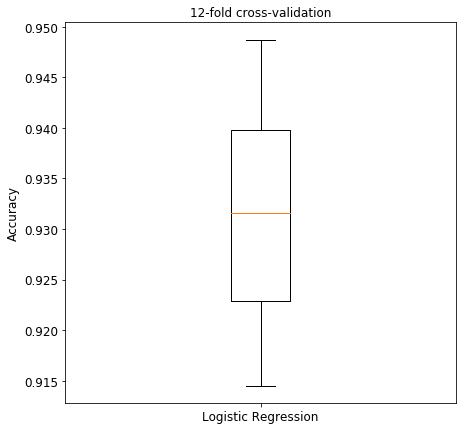

In [8]:
kfold = StratifiedKFold(n_splits=12, random_state=1)
cv_results = cross_val_score(LR_1, X_train_LR, Y_train_LR, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % ('Logistic Regression', cv_results.mean(), cv_results.std()))

labels = ['Logistic Regression']
plt.figure(figsize=(7,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize = 12)
pyplot.boxplot(cv_results, labels = labels)
plt.ylabel('Accuracy', fontsize = 12)
pyplot.title('12-fold cross-validation')
pyplot.show()

### Evaluation: 2) ROC Curve

C:\Users\Aiden\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


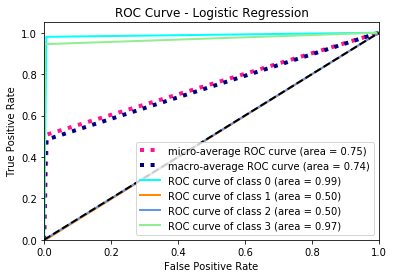

In [9]:
feature_names = dataset_clean_scaled.columns[0:10]
X_ROC = dataset_clean_scaled[feature_names]

# the target feature, i.e. diagnosis class
y_ROC = dataset_clean_scaled.price_range

# for multi-class problems need to binarise output
y_ROC = label_binarize(y_LR, classes=[0, 1, 2, 3])
n_classes = y_ROC.shape[1]

X_train_ROC, X_test_ROC, Y_train_ROC, Y_test_ROC = train_test_split(X_ROC, y_ROC, test_size=0.3, random_state=0) 

# Learn to predict each class against the other
LR_1 = OneVsRestClassifier(LogisticRegression(random_state=0, multi_class = 'multinomial',max_iter = 100))
y_score = LR_1.fit(X_train_ROC, Y_train_ROC).predict(X_test_ROC)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_ROC[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_ROC.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
lw=2
colors = ['aqua', 'darkorange', 'cornflowerblue', 'lightgreen']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# 2) Decision Tree

### Pre-processing

In [10]:
feature_names = dataset_clean_selected_features.columns[0:10]
X = dataset_clean_selected_features[feature_names]

# the target feature, i.e. diagnosis class
y = dataset_clean_selected_features.price_range

# for multi-class problems need to binarise output
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [11]:
# Model 1
DTree_1_entropy_NoPruning = DecisionTreeClassifier(criterion = 'entropy',random_state =1)
DTree_1_entropy_NoPruning.fit(X_train, Y_train)
y_pred =  DTree_1_entropy_NoPruning.predict(X_test)

print('Accuracy Score on train data:', accuracy_score(y_true=Y_train, y_pred=DTree_1_entropy_NoPruning.predict(X_train)))
print('Accuracy Score on test data:', accuracy_score(y_true=Y_test, y_pred=DTree_1_entropy_NoPruning.predict(X_test)))

Accuracy Score on train data: 1.0
Accuracy Score on test data: 0.8533333333333334


In [12]:
# Model 2
DTree_2_gini_NoPruning = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
DTree_2_gini_NoPruning.fit(X_train, Y_train)
y_pred =  DTree_2_gini_NoPruning.predict(X_test)

print('Accuracy Score on train data:', accuracy_score(y_true=Y_train, y_pred=DTree_2_gini_NoPruning.predict(X_train)))
print('Accuracy Score on test data:', accuracy_score(y_true=Y_test, y_pred=DTree_2_gini_NoPruning.predict(X_test)))

Accuracy Score on train data: 1.0
Accuracy Score on test data: 0.845


#### Due to overfitting consider pruning the tree

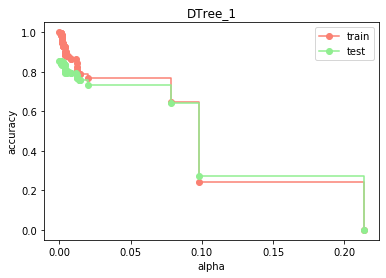

In [13]:
# Model 1 ccp_alphas

clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
path = clf.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'entropy',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("DTree_1")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post", color = 'salmon')
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post", color = 'lightgreen')
ax.legend()
plt.show()

In [14]:
# Model 3
DTree_3_entropy_WithPruning = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.005)
DTree_3_entropy_WithPruning.fit(X_train, Y_train)
y_pred =  DTree_3_entropy_WithPruning.predict(X_test)

print('Accuracy Score on train data:', accuracy_score(y_true=Y_train, y_pred=DTree_3_entropy_WithPruning.predict(X_train)))
print('Accuracy Score on test data:', accuracy_score(y_true=Y_test, y_pred=DTree_3_entropy_WithPruning.predict(X_test)))

Accuracy Score on train data: 0.8985714285714286
Accuracy Score on test data: 0.81


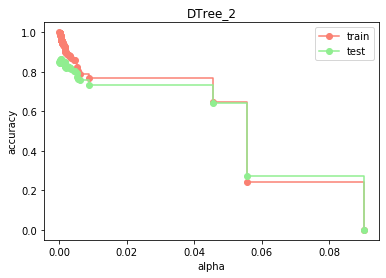

In [15]:
# Model 2 ccp_alphas

clf = DecisionTreeClassifier(criterion = 'gini', random_state=0)
path = clf.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("DTree_2")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post", color = 'salmon')
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post", color = 'lightgreen')
ax.legend()
plt.show()

In [16]:
# Model 4
DTree_4_gini_WithPruning = DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.02)
DTree_4_gini_WithPruning.fit(X_train, Y_train)
y_pred =  DTree_4_gini_WithPruning.predict(X_test)

print('Accuracy Score on train data:', accuracy_score(y_true=Y_train, y_pred=DTree_4_gini_WithPruning.predict(X_train)))
print('Accuracy Score on test data:', accuracy_score(y_true=Y_test, y_pred=DTree_4_gini_WithPruning.predict(X_test)))

Accuracy Score on train data: 0.7671428571428571
Accuracy Score on test data: 0.735


### Decision Tree Evaluation: 1) Cross-Validation

C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DTree_1: 0.848616 (0.023294)
DTree_2: 0.858594 (0.017482)
DTree_3: 0.848622 (0.032855)


C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DTree_4: 0.830748 (0.032806)


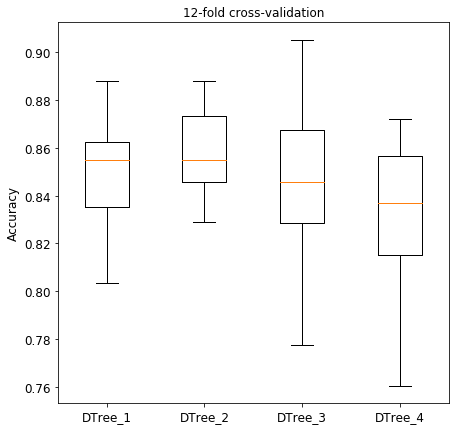

In [17]:
feature_names = dataset_clean_selected_features.columns[0:10]
X_cv = dataset_clean_selected_features[feature_names]

# the target feature, i.e. diagnosis class
y_cv = dataset.price_range

X_train_cv, X_test_cv, Y_train_cv, Y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=0) 

DTree_1_entropy_NoPruning_cv = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
DTree_2_gini_NoPruning_cv = DecisionTreeClassifier(criterion = 'gini', random_state=0)
DTree_3_entropy_WithPruning_cv = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.005, random_state=0)
DTree_4_gini_WithPruning_cv = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.02, random_state=0)

# Spot Check Algorithms
models = []
models.append(('DTree_1', DTree_1_entropy_NoPruning_cv ))
models.append(('DTree_2', DTree_2_gini_NoPruning_cv ))
models.append(('DTree_3', DTree_3_entropy_WithPruning_cv ))
models.append(('DTree_4', DTree_4_gini_WithPruning_cv ))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=12, random_state=1)
    cv_results = cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.figure(figsize=(7,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize = 12)
pyplot.boxplot(results, labels=names)
plt.ylabel('Accuracy', fontsize = 12)
pyplot.title('12-fold cross-validation')
pyplot.show()

### Decision Tree Evaluation: 2) ROC Curve 

C:\Users\Aiden\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


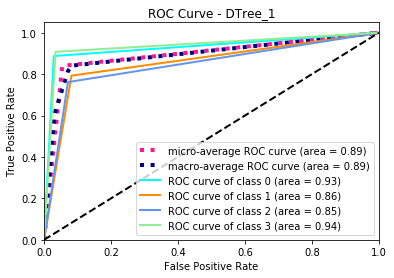

In [18]:
# Learn to predict each class against the other
DTree_1_entropy_NoPruning = OneVsRestClassifier(DecisionTreeClassifier(criterion = 'entropy'))
y_score = DTree_1_entropy_NoPruning.fit(X_train, Y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
lw=2
colors = ['aqua', 'darkorange', 'cornflowerblue', 'lightgreen']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DTree_1')
plt.legend(loc="lower right")
plt.show()

C:\Users\Aiden\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


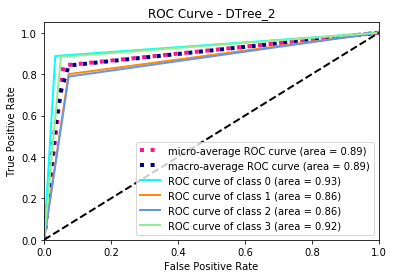

In [20]:
# Learn to predict each class against the other
DTree_2_gini_NoPruning = OneVsRestClassifier(DecisionTreeClassifier(criterion = 'gini'))
y_score = DTree_2_gini_NoPruning.fit(X_train, Y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'lightgreen']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DTree_2')
plt.legend(loc="lower right")
plt.show()

C:\Users\Aiden\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


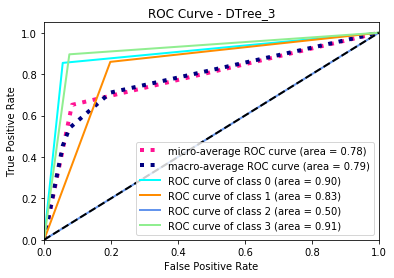

In [21]:
# Learn to predict each class against the other
DTree_3_entropy_WithPruning = OneVsRestClassifier(DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.1))
y_score = DTree_3_entropy_WithPruning.fit(X_train, Y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'lightgreen']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DTree_3')
plt.legend(loc="lower right")
plt.show()

C:\Users\Aiden\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


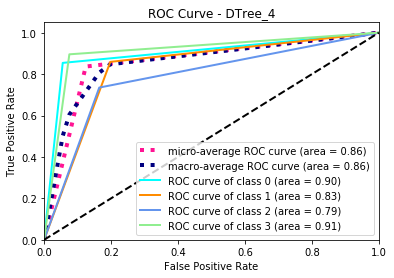

In [22]:
# Learn to predict each class against the other
DTree_4_gini_WithPruning = OneVsRestClassifier(DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.025))
y_score = DTree_4_gini_WithPruning.fit(X_train, Y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'lightgreen']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DTree_4')
plt.legend(loc="lower right")
plt.show()

## Best Model Rules (DTree_4)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_cv, y_cv, test_size=0.3, random_state=0) 
DTree_4_gini_WithPruning_cv = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.02, random_state=0)
y_pred = DTree_4_gini_WithPruning_cv.fit(X_train, Y_train).predict(X_test)

r = export_text(DTree_4_gini_WithPruning_cv, feature_names= np.array(feature_names).tolist()  ) #DT in textual format
print(r)

|--- ram <= 2235.50
|   |--- ram <= 1175.50
|   |   |--- battery_power <= 1252.50
|   |   |   |--- class: 0
|   |   |--- battery_power >  1252.50
|   |   |   |--- px_width <= 1713.50
|   |   |   |   |--- class: 0
|   |   |   |--- px_width >  1713.50
|   |   |   |   |--- class: 1
|   |--- ram >  1175.50
|   |   |--- battery_power <= 1106.50
|   |   |   |--- ram <= 1541.00
|   |   |   |   |--- class: 0
|   |   |   |--- ram >  1541.00
|   |   |   |   |--- class: 1
|   |   |--- battery_power >  1106.50
|   |   |   |--- px_width <= 1207.50
|   |   |   |   |--- class: 1
|   |   |   |--- px_width >  1207.50
|   |   |   |   |--- ram <= 1804.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- ram >  1804.50
|   |   |   |   |   |--- class: 2
|--- ram >  2235.50
|   |--- ram <= 3013.50
|   |   |--- px_width <= 1302.00
|   |   |   |--- battery_power <= 1293.00
|   |   |   |   |--- ram <= 2662.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- ram >  2662.50
|   |   |   |   |   |--- cl

## 3) Neural Networks (NN)

### Pre-processing 

In [24]:
# Feature Scaling

scaler = MinMaxScaler(feature_range=(0,1)) 
dataset_clean_scaled = pd.DataFrame(scaler.fit_transform(dataset_clean_selected_features), 
                                    columns=dataset_clean_selected_features.columns)

dataset_clean_scaled.describe()

feature_names = dataset_clean_scaled.columns[0:10]
X = dataset_clean_scaled[feature_names]

# the target feature, i.e. diagnosis class
y = dataset_clean_selected_features.price_range

# for multi-class problems need to binarise output
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

#### Model Building

In [46]:
NN_1 = Perceptron(random_state = 677, eta0=0.1, max_iter = 1000)
NN_1.fit(X_train_cv, Y_train_cv)

y_pred = NN_1.predict(X_test_cv)
accuracy_score_Test_NN_1 = accuracy_score(Y_test_cv, y_pred)
Misclassified_NN_1 = (Y_test_cv != y_pred).sum()
accuracy_score_Train_NN_1 = NN_1.score(X_train_cv, Y_train_cv)

print('Training Accuracy: %.3f' % accuracy_score_Train_NN_1 )
print('Testing Accuracy: %.3f' % accuracy_score_Test_NN_1)
print('Misclassified examples: %d' % Misclassified_NN_1)

Training Accuracy: 0.484
Testing Accuracy: 0.517
Misclassified examples: 290


In [48]:
NN_2 = Perceptron(random_state = 1, eta0=0.01, max_iter = 1000)
NN_2.fit(X_train_cv, Y_train_cv)

y_pred = NN_2.predict(X_test_cv)
accuracy_score_Test_NN_2 = accuracy_score(Y_test_cv, y_pred)
Misclassified_NN_2 = (Y_test_cv != y_pred).sum()
accuracy_score_Train_NN_2 = NN_1.score(X_train_cv, Y_train_cv)

print('Training Accuracy: %.3f' % accuracy_score_Train_NN_2 )
print('Testing Accuracy: %.3f' % accuracy_score_Test_NN_2)
print('Misclassified examples: %d' % Misclassified_NN_2)

Training Accuracy: 0.604
Testing Accuracy: 0.503
Misclassified examples: 298


In [49]:
MLP_1 = MLPClassifier(random_state = 0,activation='logistic', hidden_layer_sizes=(2,), solver='adam', max_iter=3000)
MLP_1.fit(X_train, Y_train)
MLP_1_predict = MLP_1.predict(X_test)

# Accuracy factors
accuracy_score_Train_MLP_1 = MLP_1.score(X_train, Y_train)
accuracy_score_Test_MLP_1 = MLP_1.score(X_test, Y_test)
Misclassified_MLP_1 = (Y_test != MLP_1_predict).sum()

print('Training Accuracy: %.3f' % accuracy_score_Train_MLP_1)
print('Testing Accuracy: %.3f' %  accuracy_score_Test_MLP_1)
print('Misclassified examples: %d' % Misclassified_MLP_1)

Training Accuracy: 0.817
Testing Accuracy: 0.815
Misclassified examples: 120


C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [50]:
MLP_2 = MLPClassifier(random_state = 0,activation='logistic', hidden_layer_sizes=(3,), solver='adam', max_iter=3000)
MLP_2.fit(X_train, Y_train)
MLP_2_predict = MLP_2.predict(X_test)

# Accuracy factors
accuracy_score_Train_MLP_2 = MLP_2.score(X_train, Y_train)
accuracy_score_Test_MLP_2 = MLP_2.score(X_test, Y_test)
Misclassified_MLP_2 = (Y_test != MLP_2_predict).sum()

print('Training Accuracy: %.3f' % accuracy_score_Train_MLP_2)
print('Testing Accuracy: %.3f' %  accuracy_score_Test_MLP_2)
print('Misclassified examples: %d' % Misclassified_MLP_2)

Training Accuracy: 0.954
Testing Accuracy: 0.943
Misclassified examples: 42


C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [51]:
MLP_3 = MLPClassifier(random_state = 0,activation='logistic', hidden_layer_sizes=(4,), solver='adam', max_iter=3000)
MLP_3.fit(X_train, Y_train)
MLP_3_predict = MLP_3.predict(X_test)

# Accuracy factors
accuracy_score_Train_MLP_3 = MLP_3.score(X_train, Y_train)
accuracy_score_Test_MLP_3 = MLP_3.score(X_test, Y_test)
Misclassified_MLP_3 = (Y_test != MLP_3_predict).sum()

print('Training Accuracy: %.3f' % accuracy_score_Train_MLP_3)
print('Testing Accuracy: %.3f' %  accuracy_score_Test_MLP_3)
print('Misclassified examples: %d' % Misclassified_MLP_3)

Training Accuracy: 0.961
Testing Accuracy: 0.962
Misclassified examples: 32


C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [52]:
MLP_4 = MLPClassifier(random_state = 0,activation='logistic', hidden_layer_sizes=(5,), solver='adam', max_iter=3000)
MLP_4.fit(X_train, Y_train)
MLP_4_predict = MLP_4.predict(X_test)

# Accuracy factors
accuracy_score_Train_MLP_4 = MLP_4.score(X_train, Y_train)
accuracy_score_Test_MLP_4 = MLP_4.score(X_test, Y_test)
Misclassified_MLP_4 = (Y_test != MLP_4_predict).sum()

print('Training Accuracy: %.3f' % accuracy_score_Train_MLP_4)
print('Testing Accuracy: %.3f' %  accuracy_score_Test_MLP_4)
print('Misclassified examples: %d' % Misclassified_MLP_4)

Training Accuracy: 0.963
Testing Accuracy: 0.953
Misclassified examples: 37


C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [53]:
MLP_5 = MLPClassifier(random_state = 0,activation='logistic', hidden_layer_sizes=(4,), solver='lbfgs', max_iter=3000)
MLP_5.fit(X_train, Y_train)
MLP_5_predict = MLP_5.predict(X_test)

# Accuracy factors
accuracy_score_Train_MLP_5 = MLP_5.score(X_train, Y_train)
accuracy_score_Test_MLP_5 = MLP_5.score(X_test, Y_test)
Misclassified_MLP_5 = (Y_test != MLP_5_predict).sum()

print('Training Accuracy: %.3f' % accuracy_score_Train_MLP_5)
print('Testing Accuracy: %.3f' %  accuracy_score_Test_MLP_5)
print('Misclassified examples: %d' % Misclassified_MLP_5)

Training Accuracy: 0.990
Testing Accuracy: 0.975
Misclassified examples: 30


### NN Evaluation: 1) Stratified k-fold CV 

C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MLP_1: 0.964289 (0.011483)


C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MLP_2: 0.968587 (0.014948)


C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MLP_3: 0.969293 (0.012795)


C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MLP_4: 0.968575 (0.012249)


C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MLP_5: 0.972879 (0.013433)


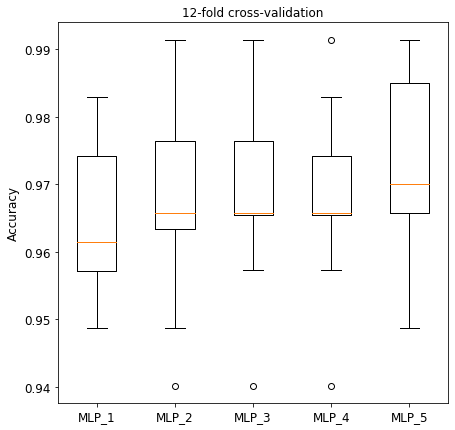

In [61]:
# Spot Check Algorithms
MLP_1_cv = MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), solver='adam', max_iter=3000)
MLP_2_cv = MLPClassifier(activation='logistic', hidden_layer_sizes=(3,), solver='adam', max_iter=3000)
MLP_3_cv = MLPClassifier(activation='logistic', hidden_layer_sizes=(4,), solver='adam', max_iter=3000)
MLP_4_cv = MLPClassifier(activation='logistic', hidden_layer_sizes=(5,), solver='adam', max_iter=3000)
MLP_5_cv = MLPClassifier(activation='logistic', hidden_layer_sizes=(4,), solver='lbfgs', max_iter=3000)

models = []
models.append(('MLP_1', MLP_1_cv ))
models.append(('MLP_2', MLP_2_cv ))
models.append(('MLP_3', MLP_3_cv ))
models.append(('MLP_4', MLP_4_cv ))
models.append(('MLP_5', MLP_5_cv ))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=12, random_state=1)
    cv_results = cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.figure(figsize=(7,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize = 12)
pyplot.boxplot(results, labels=names)
plt.ylabel('Accuracy', fontsize = 12)
pyplot.title('12-fold cross-validation')
pyplot.show()

### NN Evaluation: 2) ROC Curve

C:\Users\Aiden\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


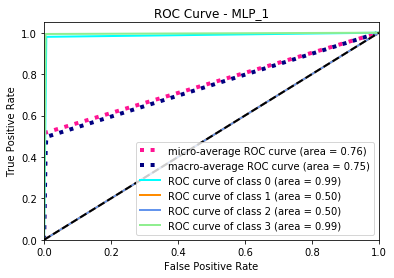

In [56]:
# Learn to predict each class against the other
MLP_1 = OneVsRestClassifier(MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), solver='adam', max_iter=3000))
y_score = MLP_1.fit(X_train, Y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
lw=2
colors = ['aqua', 'darkorange', 'cornflowerblue', 'lightgreen']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP_1')
plt.legend(loc="lower right")
plt.show()

C:\Users\Aiden\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


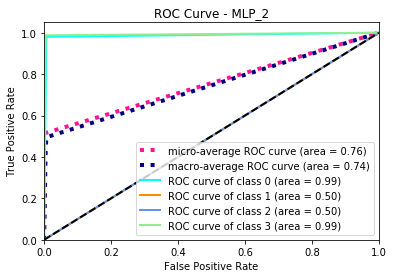

In [57]:
# Learn to predict each class against the other
MLP_2 = OneVsRestClassifier(MLPClassifier(activation='logistic', hidden_layer_sizes=(3,), solver='adam', max_iter=3000))
y_score = MLP_2.fit(X_train, Y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
lw=2
colors = ['aqua', 'darkorange', 'cornflowerblue', 'lightgreen']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP_2')
plt.legend(loc="lower right")
plt.show()

C:\Users\Aiden\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


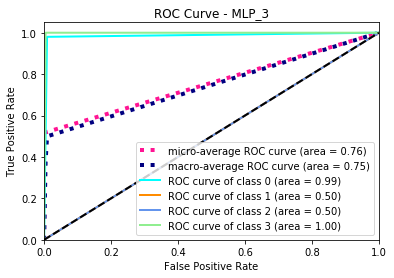

In [58]:
# Learn to predict each class against the other
MLP_3 = OneVsRestClassifier(MLPClassifier(activation='logistic', hidden_layer_sizes=(4,), solver='adam', max_iter=3000))
y_score = MLP_3.fit(X_train, Y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
lw=2
colors = ['aqua', 'darkorange', 'cornflowerblue', 'lightgreen']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP_3')
plt.legend(loc="lower right")
plt.show()

C:\Users\Aiden\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


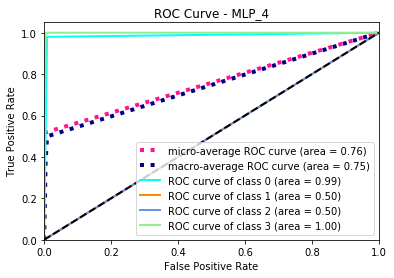

In [59]:
# Learn to predict each class against the other
MLP_4 = OneVsRestClassifier(MLPClassifier(activation='logistic', hidden_layer_sizes=(5,), solver='adam', max_iter=3000))
y_score = MLP_4.fit(X_train, Y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
lw=2
colors = ['aqua', 'darkorange', 'cornflowerblue', 'lightgreen']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP_4')
plt.legend(loc="lower right")
plt.show()

C:\Users\Aiden\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


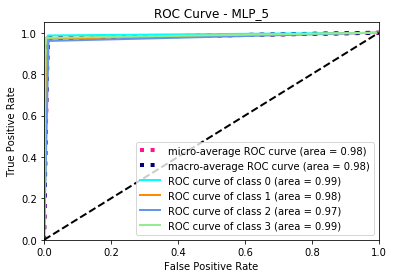

In [60]:
# Learn to predict each class against the other
MLP_5 = OneVsRestClassifier(MLPClassifier(activation='logistic', hidden_layer_sizes=(4,), solver='lbfgs', max_iter=3000))
y_score = MLP_5.fit(X_train, Y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
lw=2
colors = ['aqua', 'darkorange', 'cornflowerblue', 'lightgreen']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP_5')
plt.legend(loc="lower right")
plt.show()